# 1.

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
X, y = make_moons(n_samples=100, noise=0.24)

# 2.

In [2]:
print("X Shape", X.shape)
print("y Shape", y.shape)

X Shape (100, 2)
y Shape (100,)


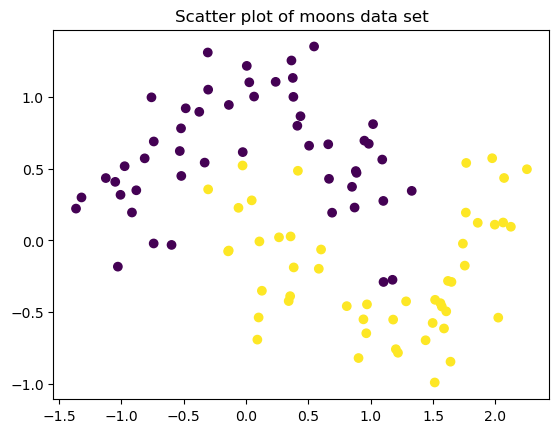

In [3]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Scatter plot of moons data set")
plt.show()

# 3.

In [4]:
def sigmoid(Z):
    return 1/(1 + np.exp(-Z))

# 4.

In [5]:
def loss(y, y_hat):
    assert(len(y) == len(y_hat))

    return - np.sum(y * np.log(y_hat))

# 5.

In [6]:
def gradients(X, y, y_hat):
    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis/predictions.
    # w --> weights (parameter).
    # b --> bias (parameter).
    # m-> number of training examples.
    m = X.shape[0]
    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y))
    return dw, db

# 6.

In [7]:
def normalize(X):
    return (X - np.mean(X)) / np.std(X)

# 7.

In [8]:
def train(X, y, epochs, lr, bs=100):
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # lr --> Learning rate.
    # m-> number of training examples
    # n-> number of features

    m, n = X.shape

    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0

    # Reshaping y.
    y = y.reshape(m,1)

    # Normalizing the inputs.
    x = normalize(X)

    # Empty list to store losses.
    losses = []

    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = x[start_i:end_i]
            yb = y[start_i:end_i]

            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b)

            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)

            # Updating the parameters.
            w -= lr*dw
            b -= lr*db

        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)

    # returning weights, bias and losses(List).
    return w, b, losses

# 8.

In [9]:
w, b, losses = train(X, y, 10000, 0.01)

print("Weights", w)
print("Bias", b)

Weights [[ 0.9830481 ]
 [-3.14275108]]
Bias -0.8108577661287091


In [10]:
y_hat = sigmoid(np.dot(X, w) + b)
y_pred = (y_hat >= 0.5).reshape(100,).astype(int)

accuracy = np.mean(y_pred == y)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 83.00%
